In [1]:
import urllib.request, json
from pandas.io.json import json_normalize
import pandas as pd

In [5]:
nyc_points = pd.read_csv("random_points.csv", names=["Lat1", "Lat2", "Long1", "Long2", "Dist", "etc"])

In [6]:
usa_points = pd.read_csv("two_thousand_random_points_usa.csv", names=["Lat1", "Lat2", "Long1", "Long2", "Dist", "etc"])

In [7]:
def url_text(Lat, Lon):
    Lat = round(Lat, 2)
    Lon = round(Lon,2)
    return("https://one-bite-api.barstoolsports.com/venue?dave=1&state=NY&lat=" + str(Lat) + "&lon=" + str(Lon))

In [8]:
with urllib.request.urlopen(url_text) as url:
    data = json.loads(url.read().decode())

AttributeError: 'function' object has no attribute 'type'

In [10]:
df = json_normalize(data)

In [11]:
total_df = df

In [12]:
for index, row in usa_points.iterrows():
    print(url_text(Lat=row['Lat2'], Lon =row['Long2']))

https://one-bite-api.barstoolsports.com/venue?dave=1&state=NY&lat=40.99&lon=-87.69
https://one-bite-api.barstoolsports.com/venue?dave=1&state=NY&lat=40.09&lon=-80.06
https://one-bite-api.barstoolsports.com/venue?dave=1&state=NY&lat=40.15&lon=-82.73
https://one-bite-api.barstoolsports.com/venue?dave=1&state=NY&lat=25.92&lon=-90.43
https://one-bite-api.barstoolsports.com/venue?dave=1&state=NY&lat=26.24&lon=-111.5
https://one-bite-api.barstoolsports.com/venue?dave=1&state=NY&lat=45.25&lon=-89.51
https://one-bite-api.barstoolsports.com/venue?dave=1&state=NY&lat=37.46&lon=-71.92
https://one-bite-api.barstoolsports.com/venue?dave=1&state=NY&lat=34.94&lon=-104.45
https://one-bite-api.barstoolsports.com/venue?dave=1&state=NY&lat=42.75&lon=-67.39
https://one-bite-api.barstoolsports.com/venue?dave=1&state=NY&lat=35.12&lon=-84.15
https://one-bite-api.barstoolsports.com/venue?dave=1&state=NY&lat=33.6&lon=-121.65
https://one-bite-api.barstoolsports.com/venue?dave=1&state=NY&lat=38.48&lon=-120.69
ht

https://one-bite-api.barstoolsports.com/venue?dave=1&state=NY&lat=47.15&lon=-108.82
https://one-bite-api.barstoolsports.com/venue?dave=1&state=NY&lat=49.02&lon=-79.33
https://one-bite-api.barstoolsports.com/venue?dave=1&state=NY&lat=28.55&lon=-84.29
https://one-bite-api.barstoolsports.com/venue?dave=1&state=NY&lat=47.55&lon=-120.58
https://one-bite-api.barstoolsports.com/venue?dave=1&state=NY&lat=26.04&lon=-107.38
https://one-bite-api.barstoolsports.com/venue?dave=1&state=NY&lat=44.66&lon=-93.3
https://one-bite-api.barstoolsports.com/venue?dave=1&state=NY&lat=27.07&lon=-79.67
https://one-bite-api.barstoolsports.com/venue?dave=1&state=NY&lat=40.75&lon=-75.44
https://one-bite-api.barstoolsports.com/venue?dave=1&state=NY&lat=34.53&lon=-93.13
https://one-bite-api.barstoolsports.com/venue?dave=1&state=NY&lat=44.61&lon=-122.1
https://one-bite-api.barstoolsports.com/venue?dave=1&state=NY&lat=31.62&lon=-102.56
https://one-bite-api.barstoolsports.com/venue?dave=1&state=NY&lat=26.27&lon=-83.07
h

In [13]:
for index, row in usa_points.iterrows():
    with urllib.request.urlopen(url_text(Lat=row['Lat2'], Lon =row['Long2'])) as url:
        data = json.loads(url.read().decode())
        df = json_normalize(data)
        total_df = total_df.append(df, ignore_index=True)
        total_df = total_df.drop_duplicates(subset=['address1', 'createdAt'])

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [22]:
total_df.dtypes

address1                               object
address2                               object
categories                             object
city                                   object
country                                object
createdAt                              object
deleted                                  bool
featuredMedia.__t                      object
featuredMedia.__v                      object
featuredMedia._id                      object
featuredMedia.assetId                  object
featuredMedia.createdAt                object
featuredMedia.deleted                    bool
featuredMedia.id                       object
featuredMedia.metadata.aspectRatio     object
featuredMedia.metadata.duration       float64
featuredMedia.metadata.frameRate      float64
featuredMedia.metadata.resolution      object
featuredMedia.modifiedAt               object
featuredMedia.playbackId               object
featuredMedia.reviewId                 object
featuredMedia.sourceUrl           

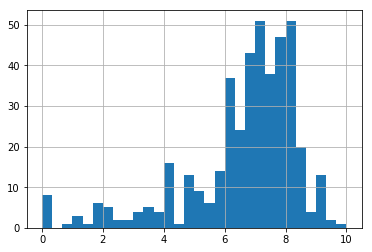

In [21]:
total_df["reviewStats.dave.averageScore"].hist(bins = 30)